In [1]:
import pandas as pd
import numpy as np

### Load data

In [2]:
df = pd.read_csv('/Users/chenjiqing/Public/bladder cancer/ML used/NMIBC.csv')
df

,Sample_Name,refage,sex,grade2,smkstat2,ImmunoTx,TenYearRFS,TenRFS,TenDead,TenYearSurv,...,T_cell,Lymph,CD4T,CD8T,NLR,MLR,CD4_to_8,CD4mem_to_nv,CD8mem_to_nv,Tmem_to_nv
0,202172220017_R01C01,69,male,Grade 3 + 4,ever-smoker,With Immuno,4.109589,1,1,53.322382,...,6.1,14.1,2.5,3.6,4.730496,0.794326,0.694444,1.777778,11.000000,4.083333
1,202172220017_R02C01,67,male,Grade 1 + 2,ever-smoker,Without Immuno,98.299795,1,1,98.299795,...,22.3,32.1,11.7,10.6,1.772586,0.230530,1.103774,1170.000000,34.333333,70.967742
2,202172220017_R03C01,69,female,Grade 1 + 2,non-smoker,With Immuno,120.000000,0,0,120.000000,...,25.6,30.9,19.1,6.5,1.977346,0.168285,2.938462,1.728571,5.500000,2.200000
3,202172220017_R05C01,63,male,Grade 1 + 2,ever-smoker,Without Immuno,28.043836,1,0,120.000000,...,33.5,40.9,19.1,14.4,1.359413,0.051345,1.326389,46.750000,13.400000,22.928571
4,202172220017_R06C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,58.546201,1,1,58.546201,...,16.5,26.6,13.6,2.9,2.045113,0.432331,4.689655,8.769231,0.705882,4.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,203755070060_R03C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,12.5,17.6,9.1,3.4,3.704545,0.630682,2.676471,1.600000,5.800000,2.125000
599,203755070060_R04C01,60,female,Grade 1 + 2,non-smoker,Without Immuno,4.800000,1,0,120.000000,...,30.9,42.4,26.3,4.6,1.087264,0.188679,5.717391,3.781818,0.000000,2.059406
600,203755070060_R05C01,50,male,Grade 1 + 2,non-smoker,Without Immuno,120.000000,0,0,120.000000,...,16.1,28.9,12.2,3.9,2.027682,0.332180,3.128205,2.666667,0.560000,1.758621
601,203755070060_R06C01,67,male,Grade 3 + 4,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,17.9,27.2,14.9,3.0,2.202206,0.202206,4.966667,3.138889,0.666667,2.314815


### Winsorization for immune cell proportions

In [3]:
df2=df.copy()
df2=df2.assign(Bas2 = np.where(df2['Bas2'] <= np.quantile(df['Bas2'],0.98),df2['Bas2'],np.quantile(df['Bas2'],0.98)),
              Bmem2 = np.where(df2['Bmem2'] <= np.quantile(df['Bmem2'],0.98),df2['Bmem2'],np.quantile(df['Bmem2'],0.98)),
              Bnv2 = np.where(df2['Bnv2'] <= np.quantile(df['Bnv2'],0.98),df2['Bnv2'],np.quantile(df['Bnv2'],0.98)),
              CD4mem2 = np.where(df2['CD4mem2'] <= np.quantile(df['CD4mem2'],0.98),df2['CD4mem2'],np.quantile(df['CD4mem2'],0.98)),
              CD4nv2 = np.where(df2['CD4nv2'] <= np.quantile(df['CD4nv2'],0.98),df2['CD4nv2'],np.quantile(df['CD4nv2'],0.98)),
              CD8mem2 = np.where(df2['CD8mem2'] <= np.quantile(df['CD8mem2'],0.98),df2['CD8mem2'],np.quantile(df['CD8mem2'],0.98)),
              CD8nv2 = np.where(df2['CD8nv2'] <= np.quantile(df['CD8nv2'],0.98),df2['CD8nv2'],np.quantile(df['CD8nv2'],0.98)),
              Eos2 = np.where(df2['Eos2'] <= np.quantile(df['Eos2'],0.98),df2['Eos2'],np.quantile(df['Eos2'],0.98)),
              Mono2 = np.where(df2['Mono2'] <= np.quantile(df['Mono2'],0.98),df2['Mono2'],np.quantile(df['Mono2'],0.98)),
              Neu2 = np.where(df2['Neu2'] <= np.quantile(df['Neu2'],0.02),np.quantile(df['Neu2'],0.02),df2['Neu2']),
              NK2 = np.where(df2['NK2'] <= np.quantile(df['NK2'],0.98),df2['NK2'],np.quantile(df['NK2'],0.98)),
              Treg2 = np.where(df2['Treg2'] <= np.quantile(df['Treg2'],0.98),df2['Treg2'],np.quantile(df['Treg2'],0.98)))


df3 = df2.copy()
for i in ['NLR','MLR','CD4_to_8','CD4mem_to_nv','CD8mem_to_nv','Tmem_to_nv']:
    df3[i] = np.where(df3[i] <= np.quantile(df[i],0.98),df3[i],np.quantile(df[i],0.98))
    
df2[['NK2','Neu2']].sort_values('NK2')

,NK2,Neu2
69,0.000,77.7
303,0.000,87.8
495,0.000,90.8
452,0.100,92.1
469,0.100,88.9
...,...,...
220,9.596,60.8
256,9.596,38.7
50,9.596,41.8
451,9.596,48.1


### Clean outcomes (didn't limit within 10 year)

In [5]:
df3=df3.assign(RecOrProg = np.where(df3['ProgressYN']=="yes","yes",np.where(df3['RecurYN']=="yes","yes","no")))

,Sample_Name,refage,sex,grade2,smkstat2,ImmunoTx,TenYearRFS,TenRFS,TenDead,TenYearSurv,...,Lymph,CD4T,CD8T,NLR,MLR,CD4_to_8,CD4mem_to_nv,CD8mem_to_nv,Tmem_to_nv,RecOrProg
0,202172220017_R01C01,69,male,Grade 3 + 4,ever-smoker,With Immuno,4.109589,1,1,53.322382,...,14.1,2.5,3.6,4.730496,0.794326,0.694444,1.777778,11.000000,4.083333,yes
1,202172220017_R02C01,67,male,Grade 1 + 2,ever-smoker,Without Immuno,98.299795,1,1,98.299795,...,32.1,11.7,10.6,1.772586,0.230530,1.103774,1170.000000,34.333333,70.967742,no
2,202172220017_R03C01,69,female,Grade 1 + 2,non-smoker,With Immuno,120.000000,0,0,120.000000,...,30.9,19.1,6.5,1.977346,0.168285,2.938462,1.728571,5.500000,2.200000,no
3,202172220017_R05C01,63,male,Grade 1 + 2,ever-smoker,Without Immuno,28.043836,1,0,120.000000,...,40.9,19.1,14.4,1.359413,0.051345,1.326389,46.750000,13.400000,22.928571,yes
4,202172220017_R06C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,58.546201,1,1,58.546201,...,26.6,13.6,2.9,2.045113,0.432331,4.689655,8.769231,0.705882,4.200000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,203755070060_R03C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,17.6,9.1,3.4,3.704545,0.630682,2.676471,1.600000,5.800000,2.125000,no
599,203755070060_R04C01,60,female,Grade 1 + 2,non-smoker,Without Immuno,4.800000,1,0,120.000000,...,42.4,26.3,4.6,1.087264,0.188679,5.717391,3.781818,0.000000,2.059406,yes
600,203755070060_R05C01,50,male,Grade 1 + 2,non-smoker,Without Immuno,120.000000,0,0,120.000000,...,28.9,12.2,3.9,2.027682,0.332180,3.128205,2.666667,0.560000,1.758621,no
601,203755070060_R06C01,67,male,Grade 3 + 4,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,27.2,14.9,3.0,2.202206,0.202206,4.966667,3.138889,0.666667,2.314815,no


In [18]:
df3.groupby(['RecOrProg']).size()

RecOrProg
no     293
yes    310
dtype: int64

### Save

In [16]:
df3.to_csv('NMIBC2.csv',index=False)

# Check info.

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sample_Name   603 non-null    object 
 1   refage        603 non-null    int64  
 2   sex           603 non-null    object 
 3   grade2        603 non-null    object 
 4   smkstat2      603 non-null    object 
 5   ImmunoTx      603 non-null    object 
 6   TenYearRFS    603 non-null    float64
 7   TenRFS        603 non-null    int64  
 8   TenDead       603 non-null    int64  
 9   TenYearSurv   603 non-null    float64
 10  SurgToBlood   598 non-null    float64
 11  SurgToBlood3  598 non-null    object 
 12  ProgressYN    504 non-null    object 
 13  RecurYN       488 non-null    object 
 14  Bas           603 non-null    float64
 15  Bmem          603 non-null    float64
 16  Bnv           603 non-null    float64
 17  CD4mem        603 non-null    float64
 18  CD4nv         603 non-null    

In [20]:
df3.describe()

,refage,TenYearRFS,TenRFS,TenDead,TenYearSurv,SurgToBlood,Bas,Bmem,Bnv,CD4mem,...,T_cell,Lymph,CD4T,CD8T,NLR,MLR,CD4_to_8,CD4mem_to_nv,CD8mem_to_nv,Tmem_to_nv
count,603.000000,603.000000,603.000000,603.000000,603.000000,598.000000,6.030000e+02,6.030000e+02,6.030000e+02,603.000000,...,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,63.159204,65.626024,0.618574,0.298507,104.349825,410.316054,1.781943e-02,4.596456e-03,3.549755e-02,0.102505,...,19.959867,27.756235,13.511277,6.448690,3.080144,0.307332,2.922048,88.861346,94.508388,31.495413
std,9.727749,49.933375,0.486140,0.457983,28.875976,317.480696,1.075164e-02,9.634450e-03,2.278283e-02,0.068267,...,10.393289,12.512117,8.181379,4.254615,2.329159,0.234353,2.541880,312.221554,284.446156,151.428498
min,29.000000,2.728767,0.000000,0.000000,10.710472,-78.000000,-3.111060e-18,-1.686899e-18,-4.308527e-20,0.000000,...,0.000000,0.010000,0.000000,0.010000,0.224964,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,11.724590,0.000000,0.000000,105.100616,170.750000,1.085868e-02,0.000000e+00,1.986331e-02,0.054284,...,12.650000,18.800000,7.700000,3.400000,1.608309,0.150806,1.380952,1.910686,0.688988,1.689775
50%,66.000000,62.028747,1.000000,0.000000,120.000000,315.000000,1.712103e-02,1.448432e-19,3.169507e-02,0.091267,...,18.900000,26.800000,12.400000,5.600000,2.337931,0.249292,2.307692,3.058824,1.875000,2.782609
75%,71.000000,120.000000,1.000000,1.000000,120.000000,559.000000,2.461041e-02,5.725280e-03,4.634365e-02,0.134880,...,26.100000,35.150000,17.700000,8.600000,3.788560,0.400910,3.392308,6.660326,6.480769,5.167582
max,79.000000,120.000000,1.000000,1.000000,120.000000,1790.000000,6.525861e-02,1.070193e-01,1.503440e-01,0.382244,...,64.900000,71.700000,48.700000,28.200000,11.920435,1.103889,14.349241,1549.600000,1250.000000,974.400000


In [50]:
df3[df3['grade2']=='Grade 1 + 2'].values

array([['202172220017_R02C01', 67, 'male', ..., 34.3333333333333,
        70.9677419354839, 'no'],
       ['202172220017_R03C01', 69, 'female', ..., 5.5, 2.2, 'no'],
       ['202172220017_R05C01', 63, 'male', ..., 13.4, 22.928571428571402,
        'yes'],
       ...,
       ['203755070060_R04C01', 60, 'female', ..., 0.0, 2.05940594059406,
        'yes'],
       ['203755070060_R05C01', 50, 'male', ..., 0.56, 1.75862068965517,
        'no'],
       ['203755070060_R08C01', 63, 'male', ..., 3.71428571428571,
        8.70833333333333, 'yes']], dtype=object)

Text(0, 0.5, 'NLR')

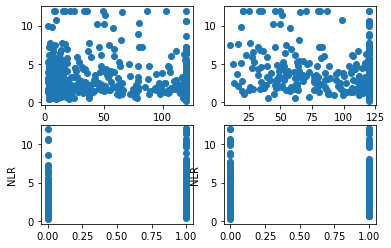

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2) # 設定圖表颜色alpha参數

plt.subplot2grid((2,2),(0,0)) # 在一張大圖裡分列幾個小圖
plt.scatter(df3.TenYearRFS,df3.NLR)

plt.subplot2grid((2,2),(0,1))
plt.scatter(df3.TenYearSurv,df3.NLR)

plt.subplot2grid((2,2),(1,0))
plt.scatter(df3.TenRFS,df3.NLR)
plt.ylabel('NLR')

plt.subplot2grid((2,2),(1,1))
plt.scatter(df3.TenDead,df3.NLR)
plt.ylabel('NLR')

# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

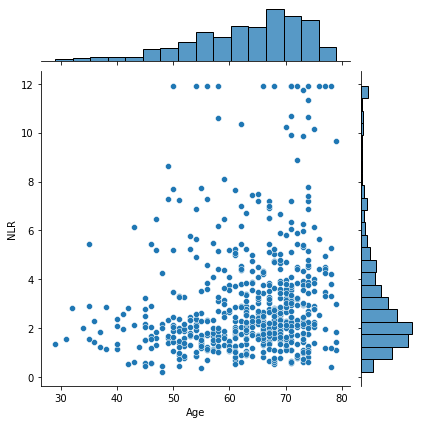

In [35]:
import seaborn as sns
Age_NLR = sns.jointplot(x='refage',y='NLR',data=df3)
Age_NLR.set_axis_labels('Age','NLR')

### RFS and Surv distribution in NMIBC patients with BCG trt. or not

Without Immuno    362
With Immuno        61
Name: ImmunoTx, dtype: int64
                Deceased  Alive
Without Immuno       152    362
With Immuno           28     61
                Recurrence  NoRecurrence
Without Immuno         314           200
With Immuno             59            30


<Figure size 432x288 with 0 Axes>

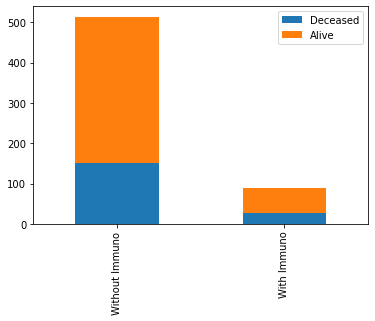

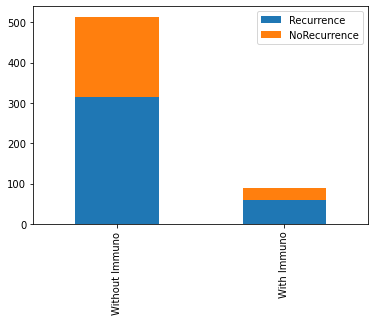

In [49]:
fig = plt.figure()
fig.set(alpha=0.3)

Surv_0 = df3.ImmunoTx[df3.TenDead == 0].value_counts()
print(Surv_0)
Surv_1 = df3.ImmunoTx[df3.TenDead == 1].value_counts()
Rec_0 = df3.ImmunoTx[df3.TenRFS == 0].value_counts()
Rec_1 = df3.ImmunoTx[df3.TenRFS == 1].value_counts()

df_Surv_Imtrt = pd.DataFrame({'Deceased':Surv_1,'Alive':Surv_0})
df_Rec_Imtrt = pd.DataFrame({'Recurrence':Rec_1,'NoRecurrence':Rec_0})
print(df_Surv_Imtrt)
print(df_Rec_Imtrt)

df_Surv_Imtrt.plot(kind='bar',stacked=True)

df_Rec_Imtrt.plot(kind='bar',stacked=True)


### Tumor grade and outcome

In [48]:
GS = df3.groupby(['grade2','TenDead'])
print(GS.count())
GR = df3.groupby(['grade2','TenRFS'])
print(GR.count())

                     Sample_Name  refage  sex  smkstat2  ImmunoTx  TenYearRFS  \
grade2      TenDead                                                             
Grade 1 + 2 0                334     334  334       334       334         334   
            1                118     118  118       118       118         118   
Grade 3 + 4 0                 89      89   89        89        89          89   
            1                 62      62   62        62        62          62   

                     TenRFS  TenYearSurv  SurgToBlood  SurgToBlood3  ...  \
grade2      TenDead                                                  ...   
Grade 1 + 2 0           334          334          330           330  ...   
            1           118          118          117           117  ...   
Grade 3 + 4 0            89           89           89            89  ...   
            1            62           62           62            62  ...   

                     Lymph  CD4T  CD8T  NLR  MLR  CD4_to